In [465]:
import torch

## train teacher

In [997]:
x = torch.randn(20, 2) * 1
ys = torch.randn(20, 2)

In [998]:
ls = torch.linalg.inv(x.T @ x) @ x.T @ ys

In [1171]:
# teacher matrix
ls = torch.tensor([
    [ 0.893, -0.2525],
        [ -0.3585,  0.5101]
]
)

In [1172]:
# ls[1,0] = -0.35

In [1173]:
w1 = torch.rand(2,2)

In [1174]:
w2 = torch.linalg.inv(w1) @ ls

w1_size = torch.sum(torch.abs(w1))
w2_size = torch.sum(torch.abs(w2))


w2 = w2 / w2_size
w1 = w1 / w1_size

# print(w2_size, w1_size)

ratio =ls / (w1 @ w2)
# print(ratio)
ratio = torch.sqrt(ratio[0][0])
# print(ratio)

w1 = w1 * ratio# * 2
w2 = w2 * ratio 

w1 @ w2

tensor([[ 0.8930, -0.2525],
        [-0.3585,  0.5101]])

In [1175]:
w1

tensor([[0.1563, 1.2089],
        [0.9384, 0.7270]])

In [1176]:
w1 @ w2

tensor([[ 0.8930, -0.2525],
        [-0.3585,  0.5101]])

(<Figure size 500x500 with 1 Axes>, <Axes: >)

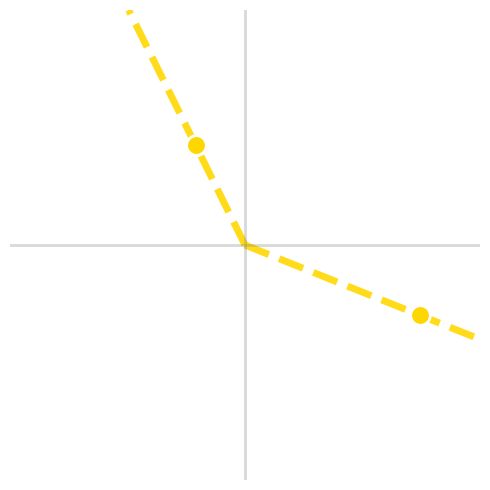

In [1177]:
plot_vibrant_vectors(((w1 @ w2)).T, [])

In [1178]:
w2

tensor([[-1.0605,  0.7839],
        [ 0.8758, -0.3102]])

## train student on axiliary logit

In [1179]:
w2_extra = w2[:,1:3]

In [1180]:
w2_extra

tensor([[ 0.7839],
        [-0.3102]])

In [1181]:
w2

tensor([[-1.0605,  0.7839],
        [ 0.8758, -0.3102]])

In [1182]:
ls_aux = torch.linalg.inv(x.T @ x) @ x.T @ ys[:,1]
ls_aux = ls_aux.view(2, 1)
ls_aux

tensor([[-0.2525],
        [ 0.5101]])

In [1183]:
w1_new = torch.outer(ls_aux.view(2), w2_extra.view(2)) / torch.norm(w2_extra)**2

In [1184]:
w1_new @ w2_extra

tensor([[-0.2525],
        [ 0.5101]])

In [1185]:
ls_aux

tensor([[-0.2525],
        [ 0.5101]])

In [1186]:
w1_new @ w2

tensor([[ 0.3919, -0.2525],
        [-0.7917,  0.5101]])

In [1187]:
w1 @ w2

tensor([[ 0.8930, -0.2525],
        [-0.3585,  0.5101]])

(<Figure size 500x500 with 1 Axes>, <Axes: >)

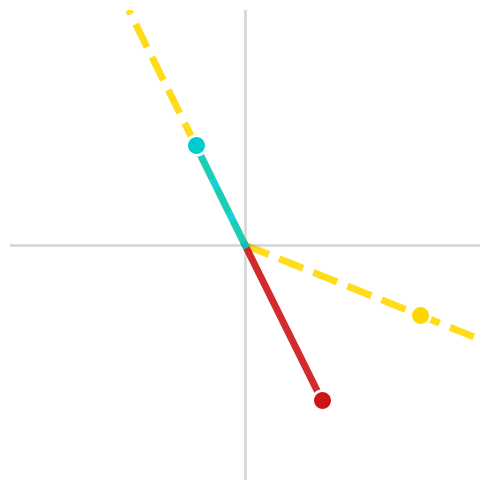

In [1188]:
plot_vibrant_vectors((w1 @ w2).T, (w1_new @ w2).T)

In [375]:
x_new = x @ w1

In [ ]:
xnew 
ls_new = torch.linalg.inv(xnew.T @ xnew) @ xnew.T @ ys

In [372]:
x.shape

torch.Size([5, 2])

In [343]:
# torch.sum(w1, dim=1)

In [344]:
w1

tensor([[0.0199, 0.0056],
        [0.0531, 0.0148]])

In [348]:
w2_extra

tensor([[0.8935, 0.2495]])

(<Figure size 500x500 with 1 Axes>, <Axes: >)

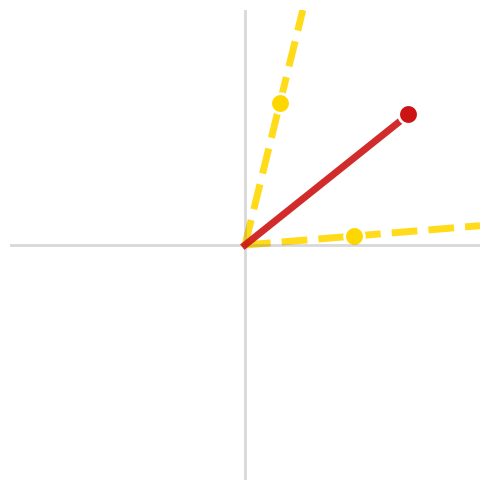

In [368]:
plot_vibrant_vectors(ls, w2_extra)

(<Figure size 500x500 with 1 Axes>, <Axes: >)

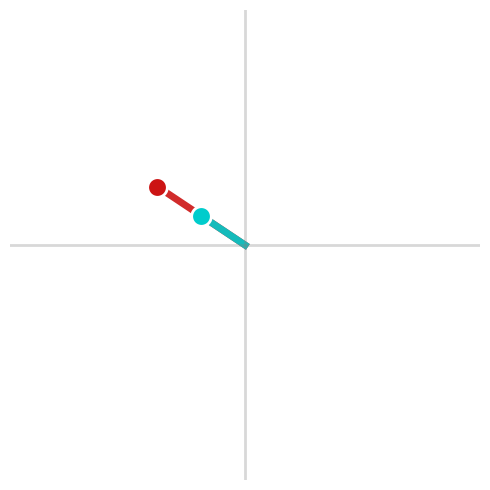

In [241]:
plot_vibrant_vectors(w1.T)

In [242]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_vibrant_vectors(vectors_set1, vectors_set2=None, figsize=(5, 5), arrow_scale=1.0, line_width=5):
    """
    Plot two sets of 2-dimensional vectors with different styles.
    
    Parameters:
    -----------
    vectors_set1 : array-like, shape (n, 2)
        First set of vectors - shown as bright yellow dotted lines extending to edges
    vectors_set2 : array-like, shape (m, 2), optional
        Second set of vectors - shown in rainbow colors on top of first set
    figsize : tuple, default (5, 5)
        Figure size in inches
    arrow_scale : float, default 1.0
        Scale factor for arrow length
    line_width : float, default 5
        Width of the arrow lines
    
    Returns:
    --------
    fig, ax : matplotlib figure and axes objects
    """
    
    # Convert to numpy arrays if needed
    vectors_set1 = np.array(vectors_set1) if vectors_set1 is not None else np.array([])
    vectors_set2 = np.array(vectors_set2) if vectors_set2 is not None else np.array([])
    
    def generate_vibrant_colors(n):
        """Generate vibrant colors using HSV color space"""
        colors = []
        for i in range(n):
            # Use full hue range with high saturation and value for vibrant colors
            hue = i / n  # Evenly space hues around the color wheel
            saturation = 0.9 + 0.1 * (i % 2)  # Very high saturation (0.9-1.0)
            value = 0.8 + 0.2 * ((i // 2) % 2)  # High brightness (0.8-1.0)
            rgb = mcolors.hsv_to_rgb([hue, saturation, value])
            colors.append(rgb)
        return colors
    
    def extend_line_to_boundary(start, direction, xlim, ylim):
        """Extend a line from start point in given direction to plot boundary"""
        # Normalize direction
        if np.linalg.norm(direction) == 0:
            return start, start
        
        direction = direction / np.linalg.norm(direction)
        
        # Calculate intersections with all four boundaries
        intersections = []
        
        # Right boundary (x = xlim[1])
        if direction[0] > 0:
            t = (xlim[1] - start[0]) / direction[0]
            y = start[1] + t * direction[1]
            if ylim[0] <= y <= ylim[1]:
                intersections.append([xlim[1], y])
        
        # Left boundary (x = xlim[0])
        if direction[0] < 0:
            t = (xlim[0] - start[0]) / direction[0]
            y = start[1] + t * direction[1]
            if ylim[0] <= y <= ylim[1]:
                intersections.append([xlim[0], y])
        
        # Top boundary (y = ylim[1])
        if direction[1] > 0:
            t = (ylim[1] - start[1]) / direction[1]
            x = start[0] + t * direction[0]
            if xlim[0] <= x <= xlim[1]:
                intersections.append([x, ylim[1]])
        
        # Bottom boundary (y = ylim[0])
        if direction[1] < 0:
            t = (ylim[0] - start[1]) / direction[1]
            x = start[0] + t * direction[0]
            if xlim[0] <= x <= xlim[1]:
                intersections.append([x, ylim[0]])
        
        # Return the closest intersection
        if intersections:
            distances = [np.linalg.norm(np.array(point) - start) for point in intersections]
            closest_idx = np.argmin(distances)
            return start, intersections[closest_idx]
        else:
            return start, start + direction * 0.1  # Fallback
    
    # Create the plot with white background
    fig, ax = plt.subplots(figsize=figsize, facecolor='white')
    ax.set_facecolor('white')
    
    # Set the axis limits first
    xlim = (-1.2, 1.2)
    ylim = (-1.2, 1.2)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    # Plot first set of vectors (bright yellow, dotted, extending to edges)
    if len(vectors_set1) > 0:
        bright_yellow = '#FFD700'  # Bright yellow color
        
        # Sort by norm for consistent layering
        vector_norms = np.linalg.norm(vectors_set1, axis=1)
        sorted_indices = np.argsort(vector_norms)[::-1]  # Descending order
        
        for idx in sorted_indices:
            vector = vectors_set1[idx]
            scaled_vector = vector * arrow_scale
            
            # Extend line to boundary
            start_point, end_point = extend_line_to_boundary([0, 0], scaled_vector, xlim, ylim)
            
            # Plot dotted line from origin to boundary
            ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 
                    color=bright_yellow, linewidth=line_width, alpha=0.9, 
                    linestyle='--', zorder=1)
            
            # Plot dot at the scaled vector endpoint
            ax.scatter(scaled_vector[0], scaled_vector[1], 
                      s=200, c=bright_yellow, marker='o', 
                      edgecolors='white', linewidth=2,
                      alpha=1, zorder=2)
    
    # Plot second set of vectors (rainbow colors, on top)
    if len(vectors_set2) > 0:
        n_vectors2 = vectors_set2.shape[0]
        colors = generate_vibrant_colors(n_vectors2)
        
        # Sort by norm for consistent layering
        vector_norms = np.linalg.norm(vectors_set2, axis=1)
        sorted_indices = np.argsort(vector_norms)[::-1]  # Descending order
        
        for idx in sorted_indices:
            vector = vectors_set2[idx]
            scaled_vector = vector * arrow_scale
            
            # Plot line from origin to vector endpoint
            ax.plot([0, scaled_vector[0]], [0, scaled_vector[1]], 
                    color=colors[idx], linewidth=line_width, alpha=0.9, zorder=3)
            
            # Plot dot at the end of the vector
            ax.scatter(scaled_vector[0], scaled_vector[1], 
                      s=200, c=[colors[idx]], marker='o', 
                      edgecolors='white', linewidth=2,
                      alpha=1, zorder=4)
    
    # Make axes equal and add grid
    ax.set_aspect('equal', adjustable='box')
    
    # Add axis lines through origin
    ax.axhline(y=0, color='gray', linewidth=2, alpha=0.3)
    ax.axvline(x=0, color='gray', linewidth=2, alpha=0.3)
    
    # Remove ticks and labels for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Remove spines for minimal look
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    plt.tight_layout()
    
    return fig, ax

In [227]:
def plot_vibrant_vectors(vectors, figsize=(5, 5), arrow_scale=1.0, line_width=5):
    """
    Plot n 2-dimensional vectors with vibrant colors similar to the provided image.
    
    Parameters:
    -----------
    vectors : array-like, shape (n, 2)
        Matrix where each row is a 2D vector to plot
    figsize : tuple, default (10, 10)
        Figure size in inches
    arrow_scale : float, default 1.0
        Scale factor for arrow length
    line_width : float, default 3
        Width of the arrow lines
    
    Returns:
    --------
    fig, ax : matplotlib figure and axes objects
    """
    
    # Convert to numpy array if needed
    vectors = np.array(vectors)
    n_vectors = vectors.shape[0]
    
    def generate_vibrant_colors(n):
        """Generate vibrant colors using HSV color space"""
        colors = []
        for i in range(n):
            # Use full hue range with high saturation and value for vibrant colors
            hue = i / n  # Evenly space hues around the color wheel
            saturation = 0.9 + 0.1 * (i % 2)  # Very high saturation (0.9-1.0)
            value = 0.8 + 0.2 * ((i // 2) % 2)  # High brightness (0.8-1.0)
            rgb = mcolors.hsv_to_rgb([hue, saturation, value])
            colors.append(rgb)
        return colors
    
    # Generate vibrant colors
    colors = generate_vibrant_colors(n_vectors)
    
    # Create the plot with white background
    fig, ax = plt.subplots(figsize=figsize, facecolor='white')
    ax.set_facecolor('white')

    # Sort vectors by norm (length) in descending order for plotting
    # This ensures shorter vectors are plotted on top of longer ones
    vector_norms = np.linalg.norm(vectors, axis=1)
    sorted_indices = np.argsort(vector_norms)[::-1]  # Descending order
    
    # Plot each vector as a line with dot at the end
    for idx in sorted_indices:
        vector = vectors[idx]
        i = idx
        # Scale the vector
        scaled_vector = vector * arrow_scale
        
        # Plot line from origin to vector endpoint
        ax.plot([0, scaled_vector[0]], [0, scaled_vector[1]], 
                color=colors[i], linewidth=line_width, alpha=0.9)
        
        # Plot dot at the end of the vector
        ax.scatter(scaled_vector[0], scaled_vector[1], 
                  s=200, c=[colors[i]], marker='o', 
                  edgecolors='white', linewidth=2,
                  alpha=1, zorder=10)
    
    # Set the axis properties
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    
    # Make axes equal and add grid
    ax.set_aspect('equal', adjustable='box')
    # ax.grid(True, alpha=0.2, color='lightgray', linewidth=3)
    
    # Add axis lines through origin
    ax.axhline(y=0, color='gray', linewidth=2, alpha=0.3)
    ax.axvline(x=0, color='gray', linewidth=2, alpha=0.3)
    
    # Remove ticks and labels for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Remove spines for minimal look
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    plt.tight_layout()
    
    return fig, ax